In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Connect to APIs

# start with Citi API

In [ ]:
# Wealthfront vs Schwab vs Vangaurd


In [60]:
# buying a home vs investing 
# also should I refinance?

# set variables
home_price = 785000
down_payment = .2
loan = home_price - (home_price * down_payment)
loan_term = 30 # years
interest = .04


print np.pmt(interest/12, loan_term*12, loan)

-2998.16805552


In [112]:
import mortgage
m = mortgage.Mortgage(interest=interest, amount=loan, months=loan_term*12)
mortgage.print_summary(m)
# m.monthly_payment()
# m.total_payout()

                     Rate:      0.040000
             Month Growth:      1.003333
                      APY:      0.040742
             Payoff Years:            30
            Payoff Months:           360
                   Amount:     628000.00
          Monthly Payment:       2998.17
           Annual Payment:      35978.04
             Total Payout:    1079341.20


In [46]:
# We can find the amount of principle paid in the first year.
a = 0
for count, i in enumerate(m.monthly_payment_schedule()):
    print i, i[0] + i[1]
    a += i[0]
    if count == 11:
        break
print a

(Decimal('904.84'), Decimal('2093.33')) 2998.17
(Decimal('907.85'), Decimal('2090.32')) 2998.17
(Decimal('910.88'), Decimal('2087.29')) 2998.17
(Decimal('913.92'), Decimal('2084.25')) 2998.17
(Decimal('916.96'), Decimal('2081.21')) 2998.17
(Decimal('920.02'), Decimal('2078.15')) 2998.17
(Decimal('923.08'), Decimal('2075.09')) 2998.17
(Decimal('926.16'), Decimal('2072.01')) 2998.17
(Decimal('929.25'), Decimal('2068.92')) 2998.17
(Decimal('932.35'), Decimal('2065.82')) 2998.17
(Decimal('935.45'), Decimal('2062.72')) 2998.17
(Decimal('938.57'), Decimal('2059.60')) 2998.17
11059.33


In [42]:
# We can find the amount of principle paid in the first year.
from itertools import islice
print sum(month[0] for month in islice(m.monthly_payment_schedule(), 12))

11059.33


In [61]:
# P = int(input("Enter starting principle please. "))
# n = int(input("Enter Compound intrest rate.(daily, monthly, quarterly, half-year, yearly) "))
# r = float(input("Enter annual interest amount. (decimal) "))
# t = int(input("Enter the amount of years. "))

P = 157000
n = 12
r = .07
t = 30

final = P * (((1 + (r/(100.0 * n))) ** (n*t)))
print final

160331.763908


In [71]:
principal = 157000
rate = .07
times_per_year = 12
years = 1
pmt = 2000

# pmt = np.array([-2000,-1000])

for i in range(1, 13):
    print np.fv(rate/12, i, pmt, -principal)

    
print np.fv(rate/12, times_per_year*years, pmt, -principal), 'er'

155915.833333
154825.342361
153728.490192
152625.239718
151515.553616
150399.394345
149276.724146
148147.505037
147011.698816
145869.267059
144720.171117
143564.372115
143564.372115 er


In [148]:
# put investment and mortgage together
home_price = 785000
down_payment = .2
down_payment = home_price * down_payment
loan = home_price - down_payment
loan_term = 30 # years
interest = .04
home_appreciation = 1500000
home_appreciation_rate = .04

m = mortgage.Mortgage(interest=interest, amount=loan, months=loan_term*12)

home = []
a = int(down_payment)
for count, i in enumerate(m.monthly_payment_schedule()):
    a += i[0] + i[1]
    home.append(a)

    
rate = .07
mortgage_pay = m.monthly_payment()
property_taxes = 800
house_pay = mortgage_pay + property_taxes
rent = 2000
pmt = int(house_pay - rent)
print pmt

investment = []
ha  = home_price
home_app = []
cost = []
c = int(down_payment)
for i in range(1, (loan_term * 12)+1):
    c += pmt
    cost.append(c)
    investment.append(np.fv(rate/12, i, -pmt, -down_payment))
    ha = ha * (1 + home_appreciation_rate/12)
    home_app.append(ha)
    
print c

1798
804280


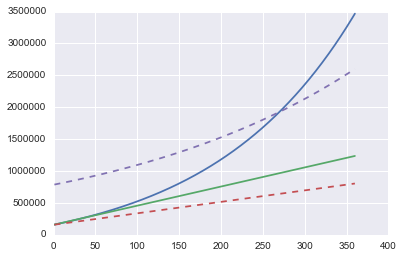

In [149]:
plt.plot(range(1,(30*12)+1), investment)
plt.plot(range(1,(30*12)+1), home)
plt.plot(range(1,(30*12)+1), cost, '--')
plt.plot(range(1,(30*12)+1), home_app, '--')
plt.show()

In [143]:
785+(785*.05)

824.25

In [144]:
785*1.05

824.25